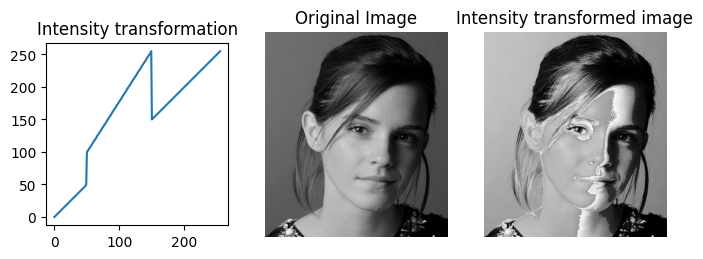

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
f = cv.imread("emma.jpg",cv.IMREAD_GRAYSCALE)
assert f is not None    #Ensure that the image was loaded successfully
t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(150,255,106)
t = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8) #concatenate and casts the result to unsigned 8-bit integers
assert len(t)==256     #Ensure that the 't' array has a length of 256:
g = cv.LUT(f,t)      #Apply the intensity transformation to the original image 'f'
fig, ax = plt.subplots(1,3,figsize=(8,8))
ax[0].plot(t), ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformed image")
plt.show()


In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
f=cv.imread("BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)
assert f is not None
t1=np.zeros(200)
t2=255*np.ones(56)
t=np.concatenate((t1,t2),axis=0).astype(np.uint8)

t1=np.zeros(75)
t2=255*np.ones(100)
t3=np.zeros(81)
s=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256
assert len(s)==256
g=cv.LUT(f,t)
h=cv.LUT(f,s)
fig,ax=plt.subplots(1,5,figsize=(18,18))
ax[0].plot(t),ax[0].set_aspect('equal'),ax[0].set_title("Inensity transformation\n for white matter enhance")
ax[1].plot(s),ax[1].set_aspect('equal'),ax[1].set_title("Intensity transformation \n for gray matter enhance")
ax[2].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)),ax[2].axis("off"),ax[2].set_title("Original image")
ax[3].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)),ax[3].axis("off"),ax[3].set_title("White matter enhanced Image")
ax[4].imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB)),ax[4].axis("off"),ax[4].set_title("Gray matter enhanced Image")
plt.show()

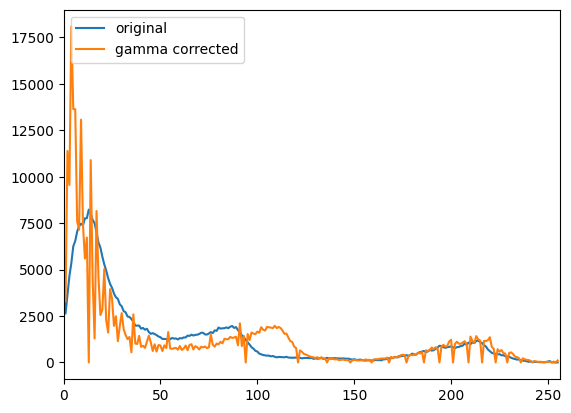

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('highlights_and_shadows.jpg')
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))
gamma = [0.8, 1.2]
for i in gamma:
 t = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
 g = cv.LUT(L,t)
 fig, ax = plt.subplots(figsize=(3,3))
 ax.set_title("\u03B3 = "+ str(i)), plt.xlim([0,256]), ax.plot(t)
 fig, ax = plt.subplots(1,2, figsize = (8,8))
 ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].set_title('Original Image')
 corrected_img = cv.merge([g, a, b])
 ax[1].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB)), ax[1].set_title('Gamma corrected')
 plt.show()
 #Question 3 (b)
 hist1 = cv.calcHist([img],[0],None,[256],[0,256])
 plt.plot(hist1), plt.xlim([0,256])
 hist2 = cv.calcHist([corrected_img],[0],None,[256],[0,256])
 plt.plot(hist2), plt.xlim([0,256]), plt.legend(('original','gamma corrected'),loc='upper left')
 plt.show()


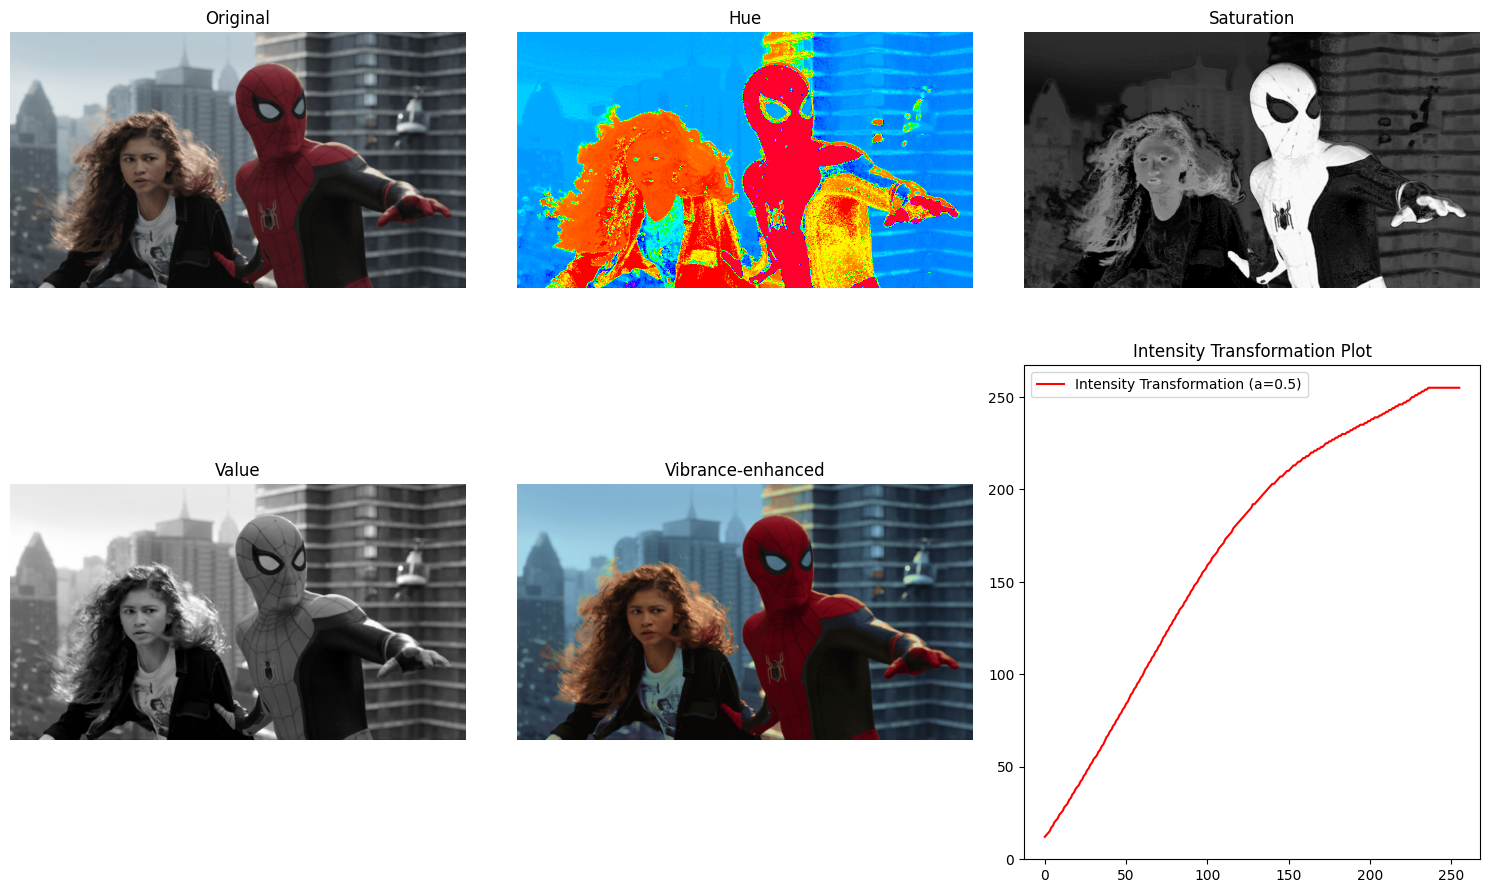

The value of 'a' used for the intensity transformation is: 0.5


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_image = cv2.imread('spider.png')
hsv_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(hsv_image)

# Define the intensity transformation function
def intensity_transformation(x, a, sigma=70):
    return np.clip(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 0, 255).astype(np.uint8)

# Apply the intensity transformation to the saturation plane
a = 0.5
transformed_saturation = intensity_transformation(saturation, a)

# Merge the modified HSV channels back into an HSV image
modified_hsv_image = cv2.merge([hue, transformed_saturation, value])

# Convert the modified HSV image back to BGR color space
output_image = cv2.cvtColor(modified_hsv_image, cv2.COLOR_HSV2BGR)

# Create a figure and subplots for displaying the images
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Display the original image
axs[0, 0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original')

# Display the hue component
axs[0, 1].imshow(hue, cmap='hsv')
axs[0, 1].axis('off')
axs[0, 1].set_title('Hue')

# Display the saturation component
axs[0, 2].imshow(saturation, cmap='gray')
axs[0, 2].axis('off')
axs[0, 2].set_title('Saturation')

# Display the value component
axs[1, 0].imshow(value, cmap='gray')
axs[1, 0].axis('off')
axs[1, 0].set_title('Value')

# Display the vibrance-enhanced image
axs[1, 1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
axs[1, 1].axis('off')
axs[1, 1].set_title('Vibrance-enhanced')

# Create a plot to show the intensity transformation function
x = np.arange(256)
y = intensity_transformation(x, a)
axs[1, 2].plot(x, y, color='red', label=f'Intensity Transformation (a={a})')
axs[1, 2].set_title('Intensity Transformation Plot')
axs[1, 2].legend()


# Show the plots
plt.tight_layout()
plt.show()

# Report the value of 'a'
print("The value of 'a' used for the intensity transformation is:", a)


In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("shells.tif", cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Define 3 subplots

ax[0].imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
ax[0].set_title("Original Image")
ax[0].axis("off")

rows = img.shape[0]
cols = img.shape[1]
arr1 = np.zeros((256,), dtype=np.uint16)
arr2 = np.zeros((256,), dtype=np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i, j]
        arr1[g] += 1

for i in range(256):
    for j in range(i + 1):
        arr2[i] += arr1[j] * (255 / (rows * cols))
    arr2[i] = round(arr2[i], 0)
arr2 = arr2.astype(np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i, j]
        img[i, j] = arr2[g]

ax[1].imshow(img, cmap="gray")
ax[1].set_title("Histogram Equalized Image")
ax[1].axis("off")

ax[2].plot(arr1)
ax[2].hist(img.flatten(), 256, [0, 256], color='r')
ax[2].legend(('Original Image Histogram'))

plt.show()


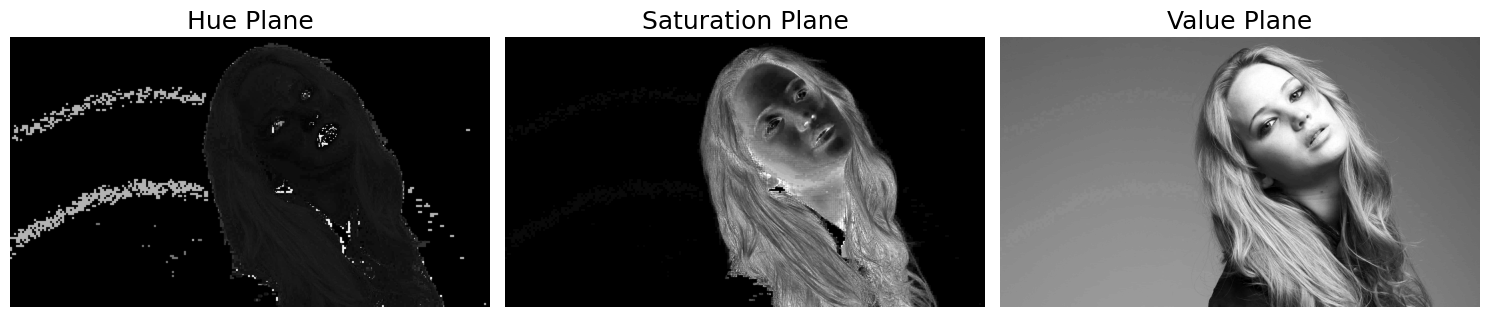

In [29]:
img = cv.imread( "jeniffer.jpg", cv.IMREAD_COLOR)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue_plane = img_hsv[:, :, 0]
saturation_plane = img_hsv[:, :, 1]
value_plane = img_hsv[:, :, 2]

plt.figure(figsize = (15, 10))
plt.rc("axes", titlesize = 18)
plt.subplot(131)
plt.imshow(img_hsv[:, :, 0], cmap = 'gray')
plt.title("Hue Plane")
plt.axis('off')
plt.subplot(132)
plt.imshow(img_hsv[:, :, 1], cmap = 'gray')
plt.title("Saturation Plane")
plt.axis('off')
plt.subplot(133)
plt.imshow(img_hsv[:, :, 2], cmap = 'gray')
plt.title("Value Plane")
plt.axis('off')
plt.tight_layout()

In [28]:
threshold = 12  # This was adjusted until the separation was satisfactory
mask = (saturation_plane > threshold).astype(np.uint8) * 255 
mask_3d = np.repeat(mask[:, :, None], 3, axis=2)

foreground_hsv = np.bitwise_and(img6_hsv, mask_3d)  # obtaining the foreground
foreground_rgb = cv.cvtColor(foreground_hsv, cv.COLOR_HSV2RGB)

plt.figure(figsize = (10, 10))
plt.subplot(131)
plt.imshow(cv.cvtColor(img6, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(mask_3d)
plt.title('Mask')
plt.axis('off')
plt.subplot(133)
plt.imshow(foreground_rgb)
plt.title('Foreground')
plt.axis('off')
plt.tight_layout()

Text(0.5, 1.0, 'Cumulative sum of histogram of foreground')

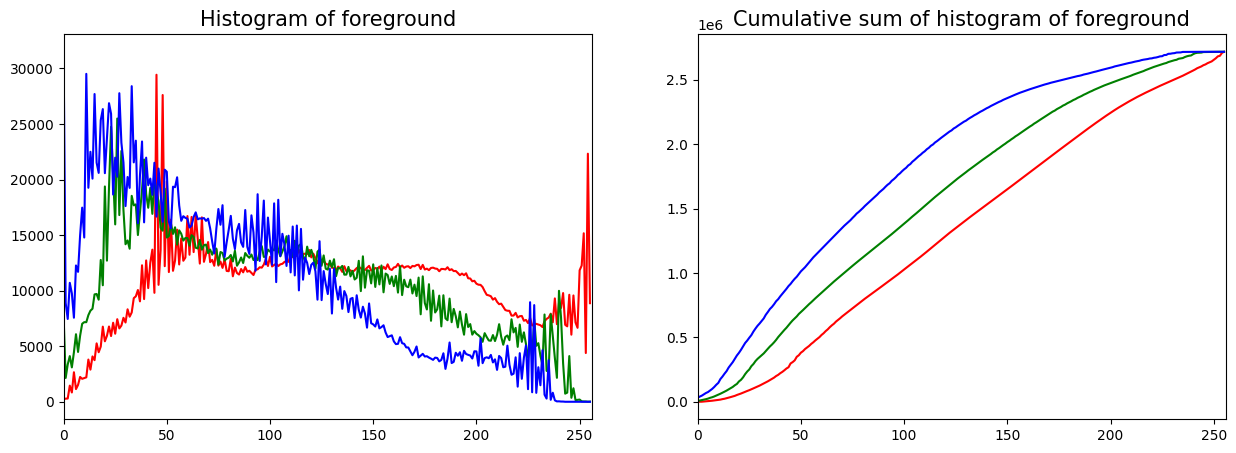

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.rc("axes", titlesize = 15)

equalized_foreground = foreground_rgb.copy()
colors = ('r', 'g', 'b')
total = mask.sum() // 255

# Loop over color channels and calculate and plot histograms
for i, color in enumerate(colors):
    # Consider only foreground by giving mask as an argument
    hist = cv.calcHist([foreground_rgb], [i], mask, [256], [0, 256])
    ax[0].plot(hist, color=color)
    ax[0].set_xlim([0, 256])

    cumulative = np.cumsum(hist)
    ax[1].plot(cumulative, color=color)
    ax[1].set_xlim([0, 256])

    transform = cumulative * 255 / cumulative[-1]
    equalized_foreground[:, :, i] = transform[foreground_rgb[:, :, i]]

# Remove background again after equalization
equalized_foreground = np.bitwise_and(equalized_foreground, mask_3d)

ax[0].set_title("Histogram of foreground")
ax[1].set_title("Cumulative sum of histogram of foreground")

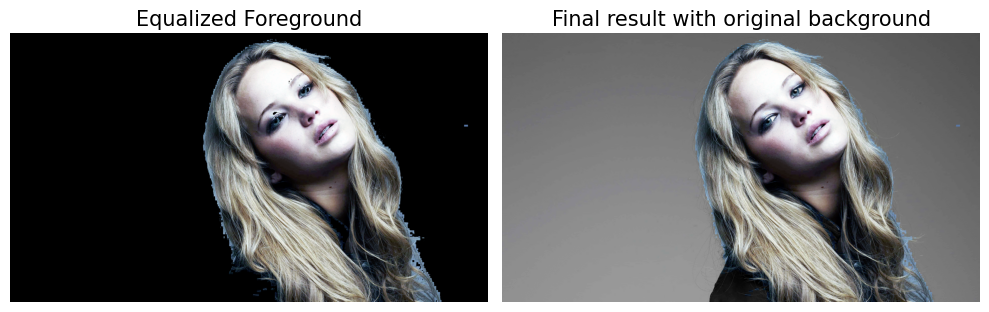

In [19]:
background_mask_3d = 255 - mask_3d
background_hsv = np.bitwise_and(img6_hsv, background_mask_3d)   # Extract background
background_rgb = cv.cvtColor(background_hsv, cv.COLOR_HSV2RGB)
final_image = background_rgb + equalized_foreground     # Add with foreground

plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(equalized_foreground)
plt.title('Equalized Foreground')
plt.axis('off')
plt.subplot(122)
plt.imshow(final_image)
plt.title('Final result with original background')
plt.axis('off')
plt.tight_layout()

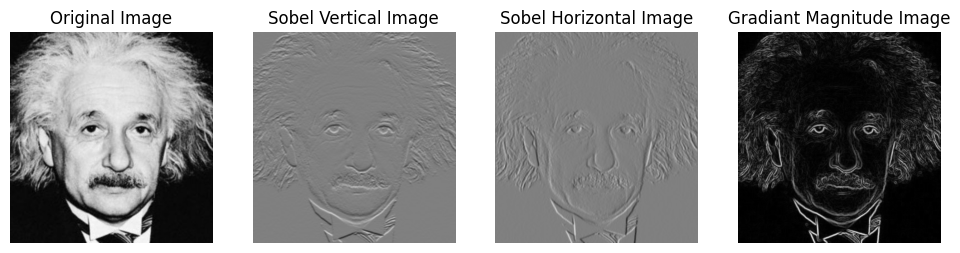

In [5]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
im = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
sobel_v = np.array([(-1,-2,-1), (0,0,0), (1,2,1)], dtype='float')
sobel_h = np.array([(-1,0,1), (-2,0,2), (-1,0,1)], dtype='float')
imv = cv.filter2D(im, -1, sobel_v)
imh = cv.filter2D(im, -1, sobel_h)
grad_mag = np.sqrt(imv**2+imh**2)
fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(12,12))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255), axes[0].set_title('Original Image'),axes[0].axis("off")
axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020), axes[1].set_title('Sobel Vertical Image'),axes[1].axis("off")
axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020), axes[2].set_title('Sobel Horizontal Image'),axes[2].axis("off")
axes[3].imshow(grad_mag, cmap='gray'), axes[3].set_title('Gradiant Magnitude Image'),axes[3].axis("off")
plt.show()

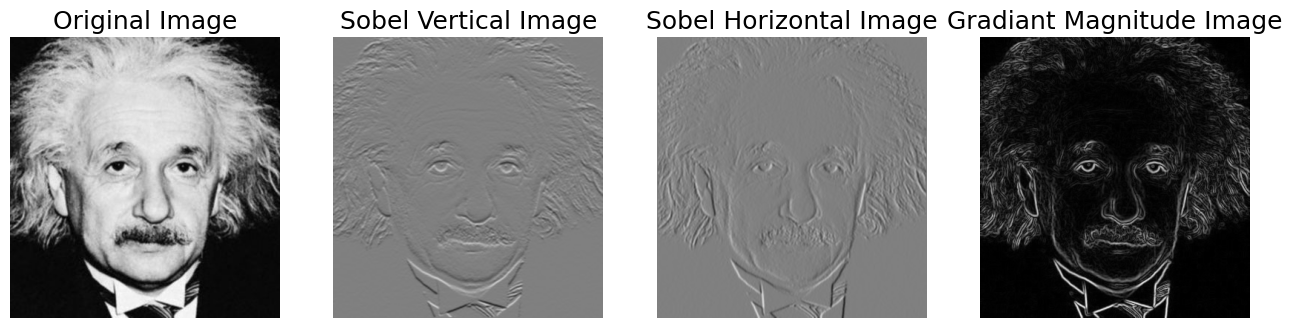

In [44]:
#Qb
import cv2 as cv
import numpy as np
img = cv.imread("einstein.png")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(float)
x_edge = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
y_edge = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
edge = np.sqrt(x_edge**2+y_edge**2)
fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(16,16))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255), axes[0].set_title('Original Image'),axes[0].axis("off")
axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020), axes[1].set_title('Sobel Vertical Image'),axes[1].axis("off")
axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020), axes[2].set_title('Sobel Horizontal Image'),axes[2].axis("off")
axes[3].imshow(grad_mag, cmap='gray'), axes[3].set_title('Gradiant Magnitude Image'),axes[3].axis("off")
plt.show()

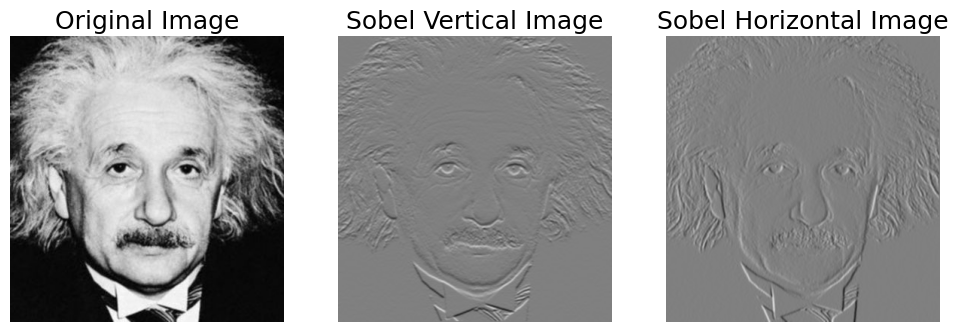

In [66]:
#Qc
import cv2 as cv
import numpy as np
im = cv.imread("einstein.png")
im = cv.cvtColor(im,cv.COLOR_BGR2GRAY).astype(float)
sobel_h_kernel = np.array([1,2,1], dtype=np.float32)
sobel_v_kernel = np.array([1,0,-1], dtype=np.float32)
im1 = cv.sepFilter2D(im, -1, sobel_h_kernel, sobel_v_kernel)
im2 = cv.sepFilter2D(im, -1, sobel_v_kernel, sobel_h_kernel)
fig, ax = plt.subplots(1,3, figsize=(12,12))

ax[0].imshow(im, cmap='gray', vmin=0, vmax=255), ax[0].set_title('Original Image'),ax[0].axis("off")
ax[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020), ax[1].set_title('Sobel Vertical Image'),ax[1].axis("off")
ax[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020), ax[2].set_title('Sobel Horizontal Image'),ax[2].axis("off")
plt.show()

SSD of Nearest Neighbour method: 0.0005373686353222803
SSD of Bilinear method: 0.0005508223530677501


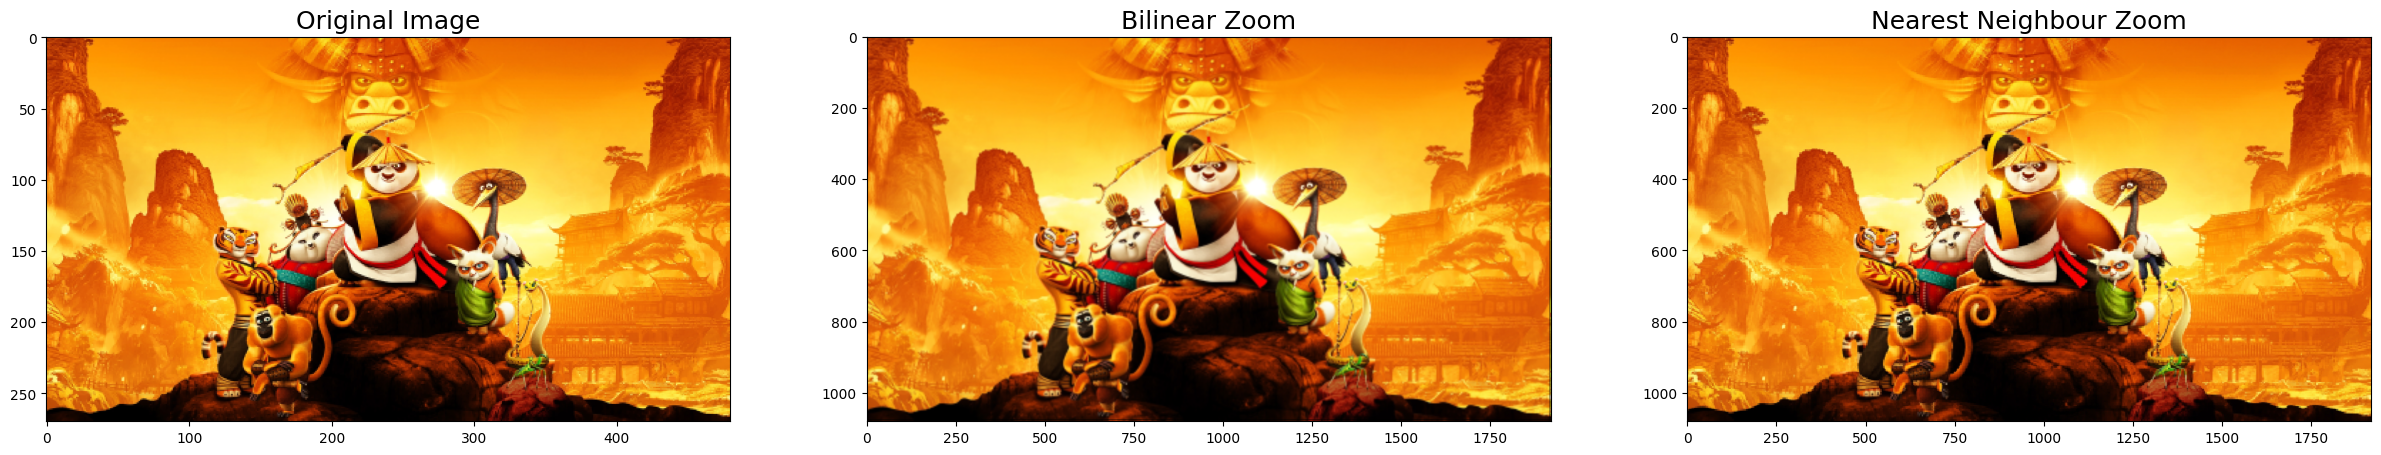

In [65]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Nearest Neighbor Interpolation
def nearest_neighbor_zoom(img, factor):
    zoomed = np.zeros((int(img.shape[0] * factor), int(img.shape[1] * factor), 3), dtype=img.dtype)
    for i in range(zoomed.shape[0]):
        for j in range(zoomed.shape[1]):
            x = int(round(i / factor))
            y = int(round(j / factor))
            if x >= img.shape[0]:
                x = img.shape[0] - 1
            if y >= img.shape[1]:
                y = img.shape[1] - 1
            zoomed[i, j] = img[x, y]
    return zoomed

# Bilinear Interpolation
def bilinear_zoom(img, factor):
    zoomed = np.zeros((int(img.shape[0] * factor), int(img.shape[1] * factor), 3), dtype=img.dtype)
    for i in range(zoomed.shape[0]):
        for j in range(zoomed.shape[1]):
            x = i / factor
            y = j / factor
            x1 = int(x)
            y1 = int(y)
            x2 = int(x) + 1
            y2 = int(y) + 1
            if x1 >= img.shape[0]:
                x1 = img.shape[0] - 1
            if x2 >= img.shape[0]:
                x2 = img.shape[0] - 1
            if y1 >= img.shape[1]:
                y1 = img.shape[1] - 1
            if y2 >= img.shape[1]:
                y2 = img.shape[1] - 1
            val1 = img[x1, y1] * abs(y - y2) + img[x1, y2] * abs(y - y1)
            val2 = img[x2, y1] * abs(y - y2) + img[x2, y2] * abs(y - y1)
            val3 = val1 * abs(x - x2) + val2 * abs(x - x1)
            for k in range(3):
                val3[k] = int(round(val3[k], 0))
            zoomed[i, j] = val3
    return zoomed

# Calculate normalized SSD
def normalized_ssd(image1, image2):
    ssd = np.sum((image1 - image2) ** 2)
    return ssd / (image1.size * 255 * 255)

# Load the image
image = cv.imread('im06small.png')
image_converted = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Set the zoom factor
factor = 4

# Perform zooming using both methods
zoomed_bilinear = bilinear_zoom(image, factor)
zoomed_nearest = nearest_neighbor_zoom(image, factor)

# Display the original and zoomed images
fig, ax = plt.subplots(1, 3, figsize=(30, 30))
ax[0].imshow(image_converted)
ax[0].set_title('Original Image')

image_converted_bilinear = cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB)
ax[1].imshow(image_converted_bilinear)
ax[1].set_title('Bilinear Zoom')

image_converted_nearest = cv.cvtColor(zoomed_nearest, cv.COLOR_BGR2RGB)
ax[2].imshow(image_converted_nearest)
ax[2].set_title('Nearest Neighbour Zoom')

# Calculate and print normalized SSD
image_original = cv.imread('im06.png')
ssd_nearest = normalized_ssd(image_original, zoomed_nearest)
ssd_bilinear = normalized_ssd(image_original, zoomed_bilinear)
print("SSD of Nearest Neighbour method:", ssd_nearest)
print("SSD of Bilinear method:", ssd_bilinear)

plt.show()


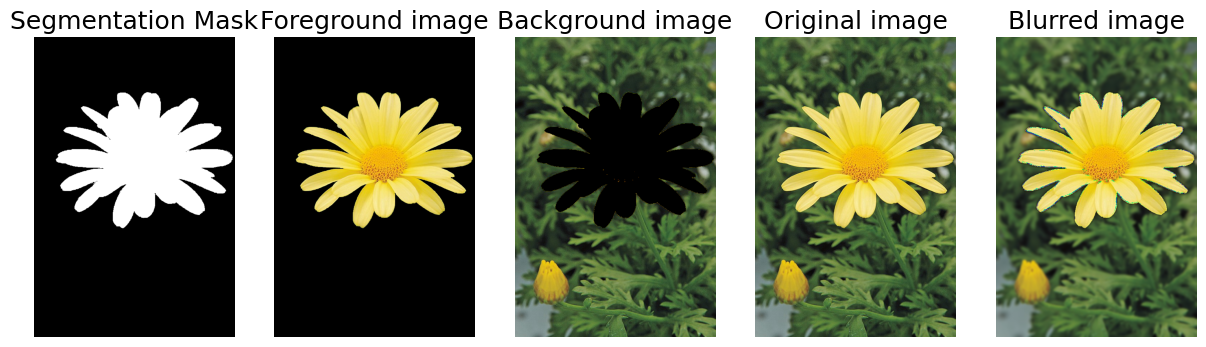

In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("daisy.jpg")
mask = np.zeros(img.shape[:2], np.uint8)
background_model = np.zeros((1,65), np.float64)
foreground_model = np.zeros((1,65), np.float64)
rectangle = (50,50,505,505)
cv.grabCut(img, mask, rectangle, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask1 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask1[:,:,np.newaxis]
fig, ax = plt.subplots(1,5, figsize = (15,15))
ax[0].imshow(mask1, cmap='gray'), ax[0].set_title("Segmentation Mask"), ax[0].axis("off")
ax[1].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), ax[1].set_title("Foreground image"), ax[1].axis("off")
cv.grabCut(img, mask, rectangle, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==3)|(mask==1),0,1).astype('uint8')
img2 = img*mask2[:,:,np.newaxis]
ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)), ax[2].set_title("Background image"), ax[2].axis("off")
ax[3].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), ax[3].set_title("Original image"), ax[3].axis("off")
#Question 7 (b)
blurred_img = img1 + cv.GaussianBlur(img2,(15,15),0)
ax[4].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB)), ax[4].set_title("Blurred image"), ax[4].axis("off")
plt.show()